<a id='top'></a>

# Homework 3: More Simulation
***

**Name**: Shreyas Kadekodi

***

This assignment is due on Canvas by **11:59 PM on July 24, 2020**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---


In [1]:
import pandas as pd
import numpy as np
import math
import random
from scipy import stats
import matplotlib.pylab as plt
%matplotlib inline


### [25 points] Problem 1 - Monte Carlo Estimation of Definite Integrals

One really cool application of random variables is using them to approximate integrals/area under a curve.  This method of approximating integrals is used frequently in computational science to approximate really difficult integrals that we never want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on a relatively simple integral. 

**Part A.**  Let $X$ be a random variable representing how delicious a pie you bake is, as measured by the **Deliciousness Index** (DI).  Suppose the probability density function for $X$ is described by the raised sine probability density function:

$$
f(x) = \begin{cases}
         \dfrac{1}{2\pi}\left(\sin{(x)} + 1\right) & 0 \leq x \leq 2\pi \\
         0                           & \text{otherwise}
         \end{cases}
$$

A Deliciousness Index of $2\pi$ is the most delicious pie you can ever hope to create, and a DI of $0$ is the most disgusting pie you have ever tasted.  

Compute **by hand**, the integral of $f(x)$ for $0 \leq x \leq \pi$.  Write a sentence or two to interpret your result physically, in the context of this problem set-up.

$\int_{0}^{\pi}\dfrac{1}{2\pi}\left(\sin{(x)} + 1\right) dx = \dfrac{1}{2\pi} \int_{0}^{\pi}\left(\sin{(x)} + 1\right) dx = \dfrac{1}{2\pi} \left(-\cos{(x)} + x\right) ]_{0}^{\pi} = \dfrac{1}{2\pi} ((-\cos{(\pi)}+\pi)-(-\cos{(0)}+0) = \dfrac{1}{2\pi} ((1+\pi)-(-1)) = \dfrac{2+\pi}{2\pi}$

**Part B.** Suppose we sample a random variable $X$ from $U(0,\pi)$ and another random variable $Y$ from $U(0,1)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,\pi] \times [0,1]$.  If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

$\dfrac{\dfrac{2+\pi}{2\pi}}{\pi} = \dfrac{2+\pi}{(\pi)^2}$ , which represents the total probability of the pies divided by the total possiblities. This shows what percentage of the area the curve occupies in the total rectangle, or the ratio of the curve over the total sampling.

**Part C.** How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral?  If you need inspiration, check out the in-class notebook on Stochastic Simulation (#4), specifically, the exercise where we estimated $\pi$!

Part B shows the area of the curve over the total area of the box. If we simulate points in the box, the ratio of points within the curve to the total number of points in the curve multiplied by the value of the box would yield an approximation of the area within the curve.

**Part D.** Complete the function `integrate` below to compute an approximation to the definition integral $\int_0^{\text{ub}} f(x)dx$.  Your function should take as arguments:
1. `num_samples` -- the number of points to sample,
2. `ub` -- a number between $0$ and $2\pi$ that is the upper bound of the integral, and
3. `isPlot` -- a Boolean flag for whether or not to display a plot of the results.

Your function should return an approximation of the definite integral by sampling $X$ from $U(0,\text{ub})$ and $Y$ from $U(0,1)$. For each random draw $(X,Y)$, define the random variable $Z$ that represents whether or not the sampled $Y$ value is less than $f(X)$ for the corresponding $X$ value.

Your function should perform three tasks: 

1. return the estimate of the value of the integral,
2. return the sample variance of the random variable $Z$ being simulated, using the np.var function, and
3. if `isPlot` is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

In [2]:
def integrate(num_samples,ub,isPlot):
    store=[]
    total=0
    x_val_under=[]
    x_val_over=[]
    under=[]
    over=[]
    for i in range (num_samples):
        X=random.random()*ub
        Y=random.random()
        Z=0
        if (1/(2*math.pi))*(math.sin(X)+1)>Y:
            under.append(Y)
            Z=1
            total+=1
            x_val_under.append(X)
        else:
            over.append(Y)
            x_val_over.append(X)
        store.append(Z)
    if isPlot==True:
        plt.figure()
        plt.plot(x_val_under,under, "or" , color="blue",)
        plt.plot(x_val_over,over,"or",color="red",)
        plt.title("X vs Y of sample points")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()
    if ub == 0:
        return (0,np.var(Z))
    else:
        return(ub*(total/num_samples),np.var(Z))

**Part E.** Write your own small unit tests!

First, what should your `integrate` function output if you plug in `ub=0`? Set that as `int_0_to_0` below.

Second, what should your `integrate` function output if you plug in `ub=`$2\pi$? Set that as `int_0_to_2pi` below.

Then, you can execute the cell below to run two sanity checks. Write out **in math** (like, a definite integral) what each of these two tests is checking and **why** that is a reasonable sanity check.

If these two assertions run without fail, then things seem to be working okay. Note that the upper endpoint test is stochastic, so if it fails, try running it a few times. If it fails a lot, then things are probably going wrong.

In [3]:

int_0_to_0  = 0.0
int_0_to_2pi = 1


#---------------------------------------
# DO NOT EDIT THIS CELL BELOW HERE
#---------------------------------------
assert integrate(1000, 0, False)[0] == int_0_to_0, "Error: lower endpoint test failing"
assert math.isclose(integrate(10000, 2 * np.pi, False)[0], int_0_to_2pi, abs_tol=0.03), "Error: upper endpoint test failing"

These tests are testing the upper and lower bounds of the integral, with a lower bound of 0 and an upper bound of 2pi, which are reasonable because they represent the two extremes possible, and are potential edge cases. The definite integral form is $\int_{0}^{0}\dfrac{1}{2\pi}\left(\sin{(x)} + 1\right)$ and $\int_{0}^{2\pi}\dfrac{1}{2\pi}\left(\sin{(x)} + 1\right)$

**Part F.** Run your simulation with `isPlot=True` and `ub=`$\pi$ for 1,000 samples so we can see your plot. Then, run your simulation (with `isPlot=False`) with at least 10,000 samples and estimate the value of the given integral. Be sure to leave your cells evaluated for the graders! Does your estimate agree with the exact value of the integral you computed in **Part A**? 

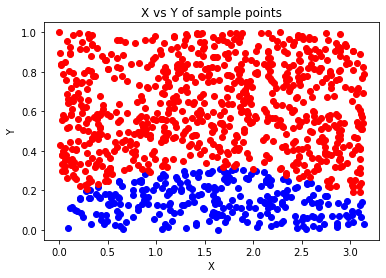

0.8337786902627312


In [5]:
integrate(1000,math.pi,True)
temp=integrate(10000,math.pi,False)
print(temp[0])

Yes, the value agrees with the value computed in part A